### DATA CLEANING AND PREPROCESSING SECTION

In [1]:
# importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the csv file
df=pd.read_csv('cardekho.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
# checking for missing values and printing out the percentages
missing=df.isnull().sum()
percentage_missing=round((missing/len(df))*100,2)
# display missing amd percentage side by side
data_dict={
    "Missing_values_counts": missing,
    "Missing_values_percentage":percentage_missing
}
missing_df = pd.DataFrame(data_dict)
missing_df



,Missing_values_counts,Missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [4]:
# Dropping values where target variable is missing
df['selling_price'].isnull().sum()


np.int64(0)

#### incase we had missing values,we could have:
- df.dropna(subset=["selling_price"], inplace=True)

In [5]:
# filling missing values with mean
df["mileage(km/ltr/kg)"]=df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"]).mean()
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

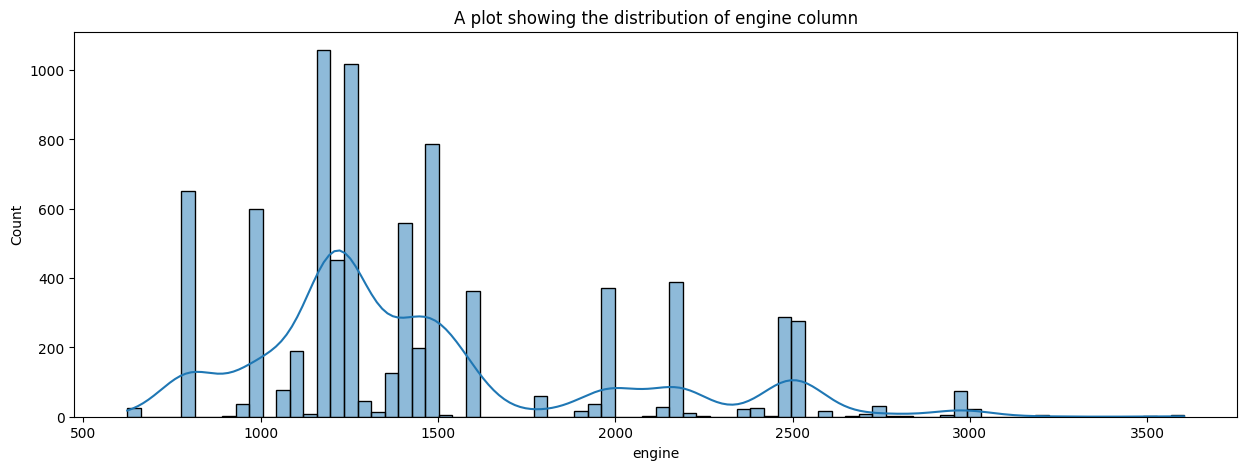

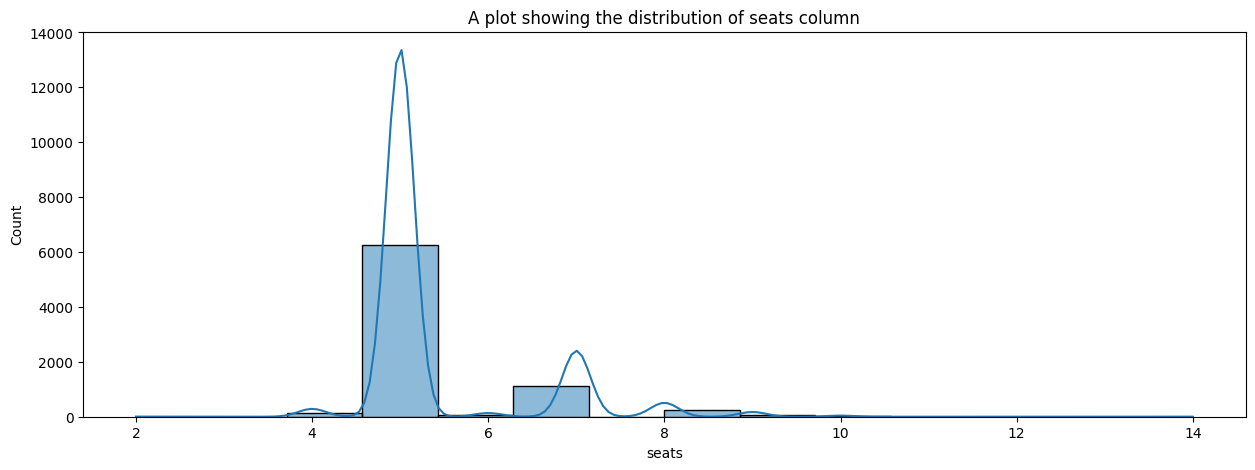

In [6]:
#Visualizing engine and seats
missing_columns=["engine","seats"]
for col in missing_columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df, x=df[col],kde=True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)

In [7]:
#filing in the missing values for engine and seats column with the median
for col in missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)

df.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [8]:
df['max_power'] = df['max_power'].str.strip().str.strip("'\"")
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [9]:
df['max_power'].replace(['',"nan","None",""],np.nan, inplace=True)

In [10]:
df['max_power']=pd.to_numeric(df['max_power'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [12]:
# fiiling max power with median
med=df["max_power"].median()
print(med)

82.0


In [13]:
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [14]:
#checking duplicated rows from the dataset.
df.duplicated().sum()

np.int64(1202)

In [15]:
#dropping duplicates
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6926 non-null   float64
 11  seats               6926 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [18]:
#converting the year column into car age
df["car_age"]= (2025-df['year'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18


In [19]:
# unique values in the fuel column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [20]:
#Checking inconsitencies in transmission column
df['transmission'].unique() 

array(['Manual', 'Automatic'], dtype=object)

In [21]:
# replacing inconsistent in transmission column
df["transmission"]=df["transmission"].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18


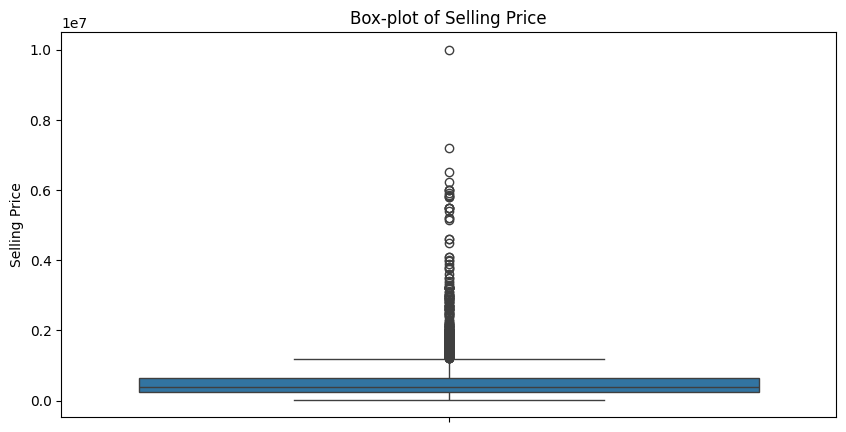

In [22]:
# box-plot - checking for outliers in the selling price column vertically
plt.figure(figsize=(10,5))
sns.boxplot(y=df['selling_price']) 
plt.title("Box-plot of Selling Price")
plt.ylabel("Selling Price")
plt.show()


In [23]:
# Removing  cars that are priced below 10,000 or above 5,000,000
df["selling_price"].sort_values(ascending=True)


5714       29999
2145       30000
6776       30000
5965       31000
1926       31504
          ...   
4766     6000000
4950     6223000
4952     6523000
2938     7200000
170     10000000
Name: selling_price, Length: 6926, dtype: int64

In [24]:
df.drop(df[(df["selling_price"] < 10000) | (df["selling_price"] > 5000000)].index,inplace=True)


In [25]:
#checking selling_values >50000000
df.loc[df['selling_price']> 50000000].value_counts().sum()

np.int64(0)

In [26]:
#Standardizing the column names so they are all lowercase and contain underscores instead of spaces.
df.columns=(df.columns
    .str.lower()
    .str.replace(' ', '_', regex=False)
)

In [27]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')

In [28]:
#Checking  if any numerical columns are stored as strings and convert them to numbers.
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
car_age                 int64
dtype: object

In [29]:
#Creating a new column price_per_kilometer
df["price_per_kilometer"] = df["selling_price"] / df["mileage(km/ltr/kg)"]
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11,23173.439434
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11,19053.716868
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19,8136.452068
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15,11586.719717
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18,6694.549170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,19.418783,998.0,67.10,5.0,12,13389.098340
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,19.418783,1396.0,88.73,5.0,11,24460.852736
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,19.418783,1197.0,82.85,5.0,12,16478.890264
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,19.418783,1493.0,110.00,5.0,18,6952.031830


In [30]:
#ensuring the dataset set index is properly reset after cleaning
df.reset_index(drop=True, inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11,23173.439434
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11,19053.716868
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19,8136.452068
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15,11586.719717
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18,6694.549170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,19.418783,998.0,67.10,5.0,12,13389.098340
6902,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,19.418783,1396.0,88.73,5.0,11,24460.852736
6903,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,19.418783,1197.0,82.85,5.0,12,16478.890264
6904,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,19.418783,1493.0,110.00,5.0,18,6952.031830


In [31]:
# Saving the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_cars.csv', index=False)